In [ ]:
!pip install datasets
!pip install pystac
!pip install planetary_computer
!pip install rioxarray
!pip install pandas
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 837.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 40.5 MB/s eta 0:00:00


In [ ]:
import os
import sys
import csv
import glob
import joblib
import datasets
import numpy as np
import pandas as pd
from pathlib import Path

# Machine Learning imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as cumlRF
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, KFold
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Geospatial related imports
from osgeo import gdalconst
from osgeo import gdal

from pprint import pprint

# Ignore a few warnings for cleaner output
warnings.filterwarnings('ignore')
%matplotlib inline

# **Global Surface Water**
Global surface water distribution and dynamics from 1984 to 2020

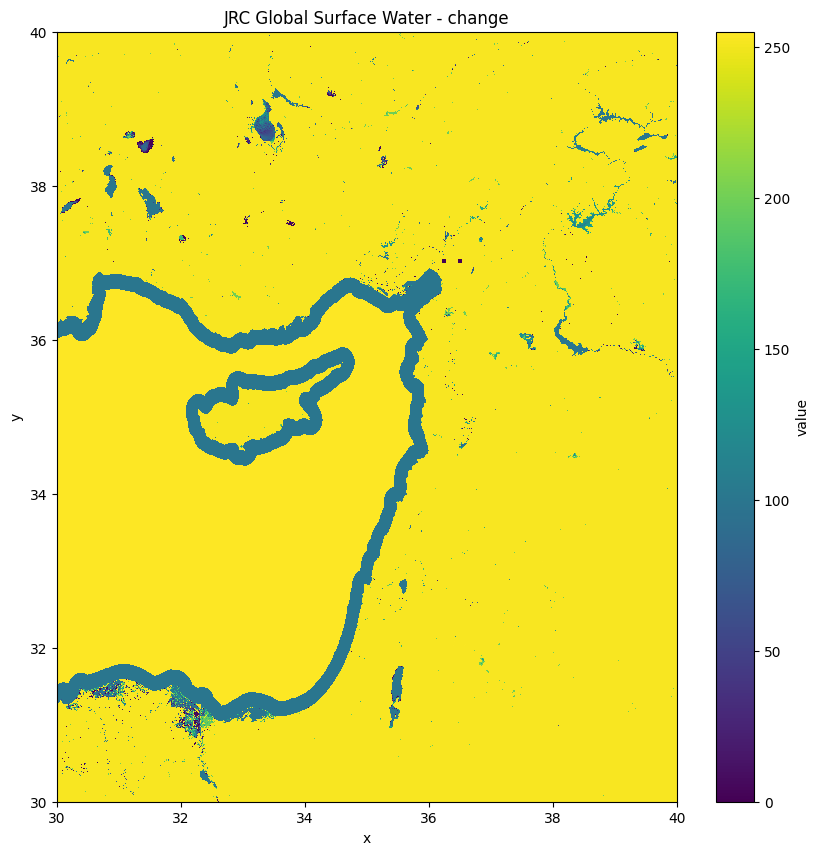

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/jrc-gsw/items/30E_40Nv1_3_2020"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'extent', 'occurrence', 'recurrence', 'seasonality', 'transitions')
asset_key = "change"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"JRC Global Surface Water - {asset_key}")
plt.show()

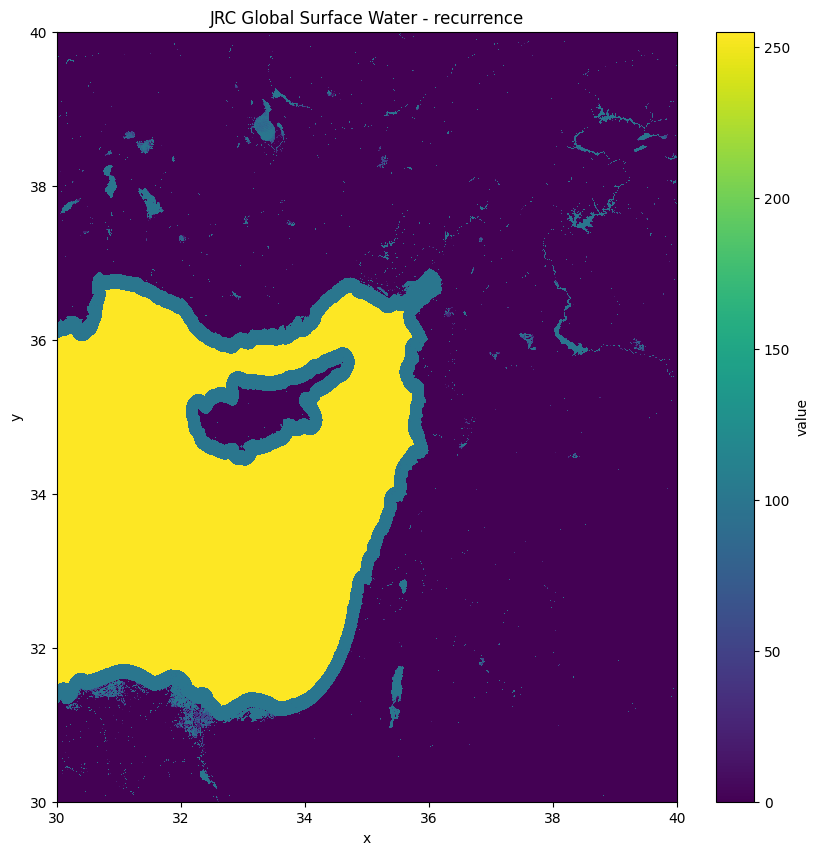

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/jrc-gsw/items/30E_40Nv1_3_2020"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'extent', 'occurrence', 'recurrence', 'seasonality', 'transitions')
asset_key = "recurrence"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"JRC Global Surface Water - {asset_key}")
plt.show()

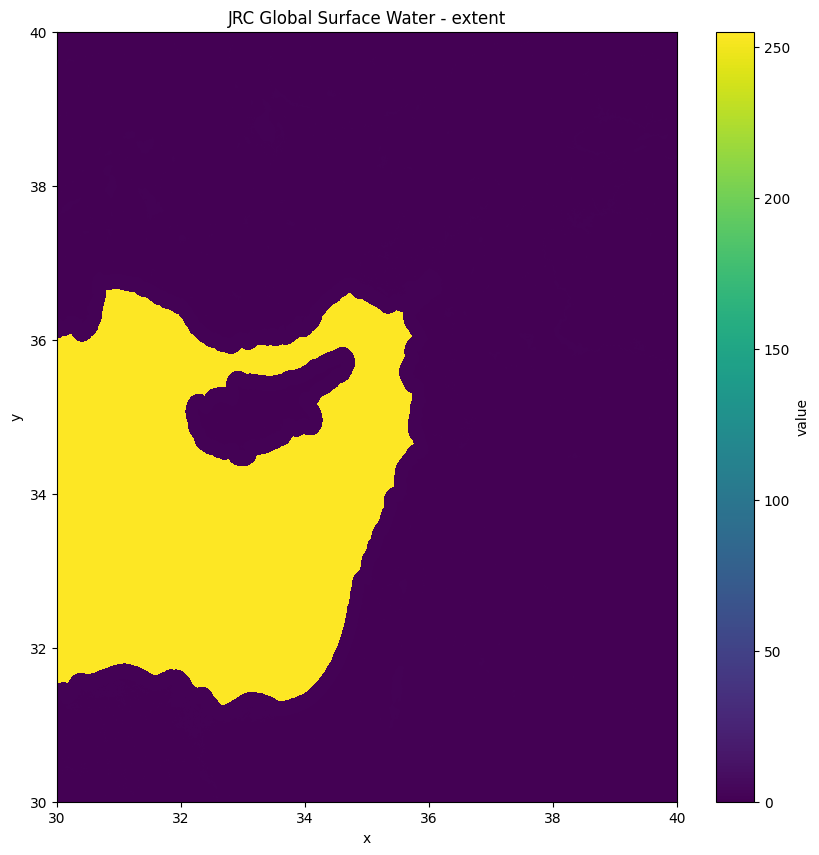

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/jrc-gsw/items/30E_40Nv1_3_2020"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'extent', 'occurrence', 'recurrence', 'seasonality', 'transitions')
asset_key = "extent"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"JRC Global Surface Water - {asset_key}")
plt.show()

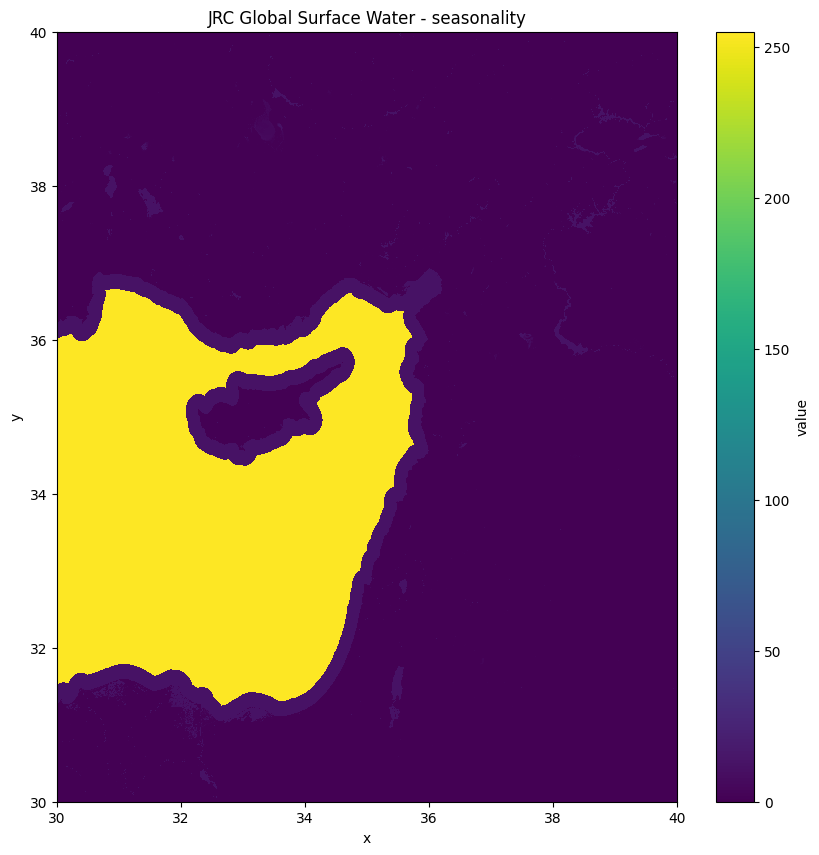

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/jrc-gsw/items/30E_40Nv1_3_2020"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'extent', 'occurrence', 'recurrence', 'seasonality', 'transitions')
asset_key = "seasonality"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"JRC Global Surface Water - {asset_key}")
plt.show()

# **MODIS Land Surface Temperature/Emissivity Daily**
Daytime land surface temperature daily 1km (Kelvin)

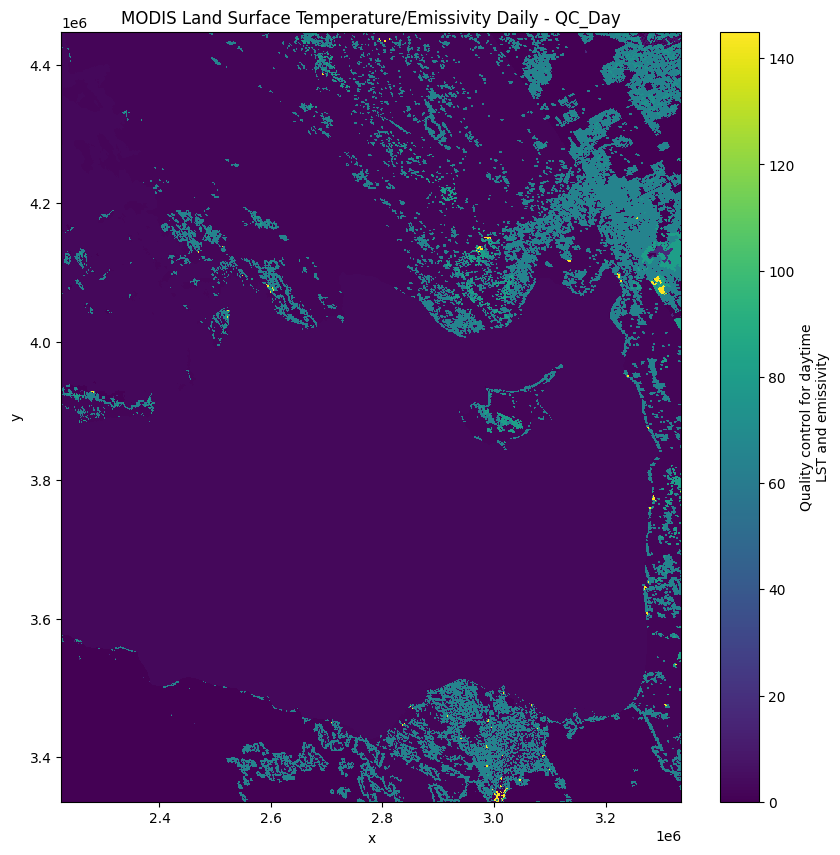

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-11A1-061/items/MYD11A1.A2024006.h20v05.061.2024009095019"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "QC_Day"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

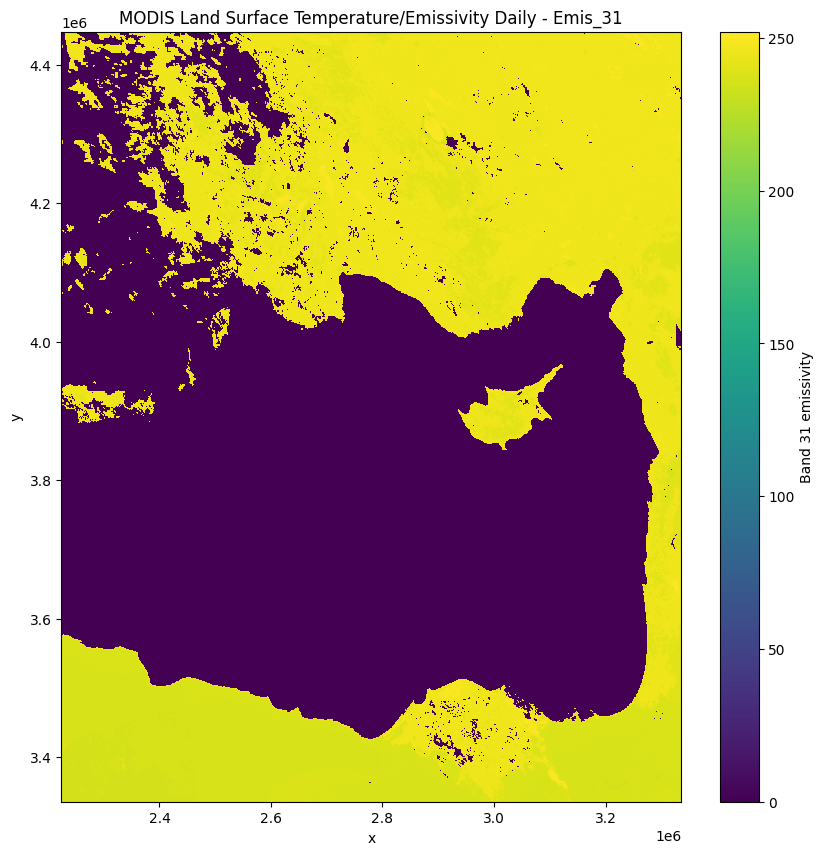

In [ ]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-11A1-061/items/MYD11A1.A2024006.h20v05.061.2024009095019"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Emis_31"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

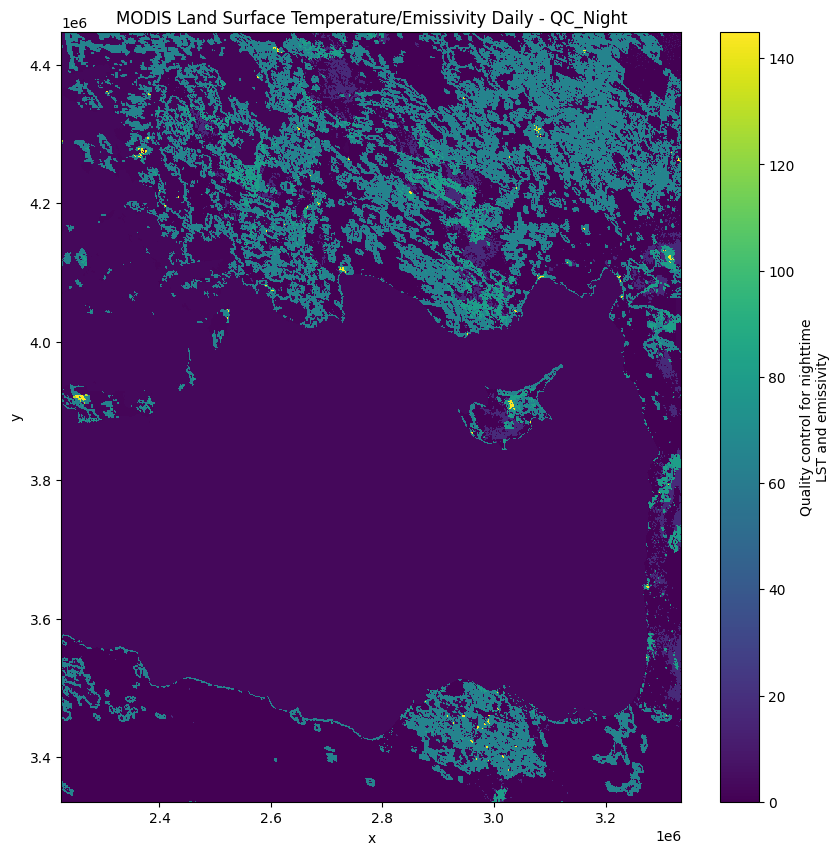

In [ ]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-11A1-061/items/MYD11A1.A2024006.h20v05.061.2024009095019"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "QC_Night"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

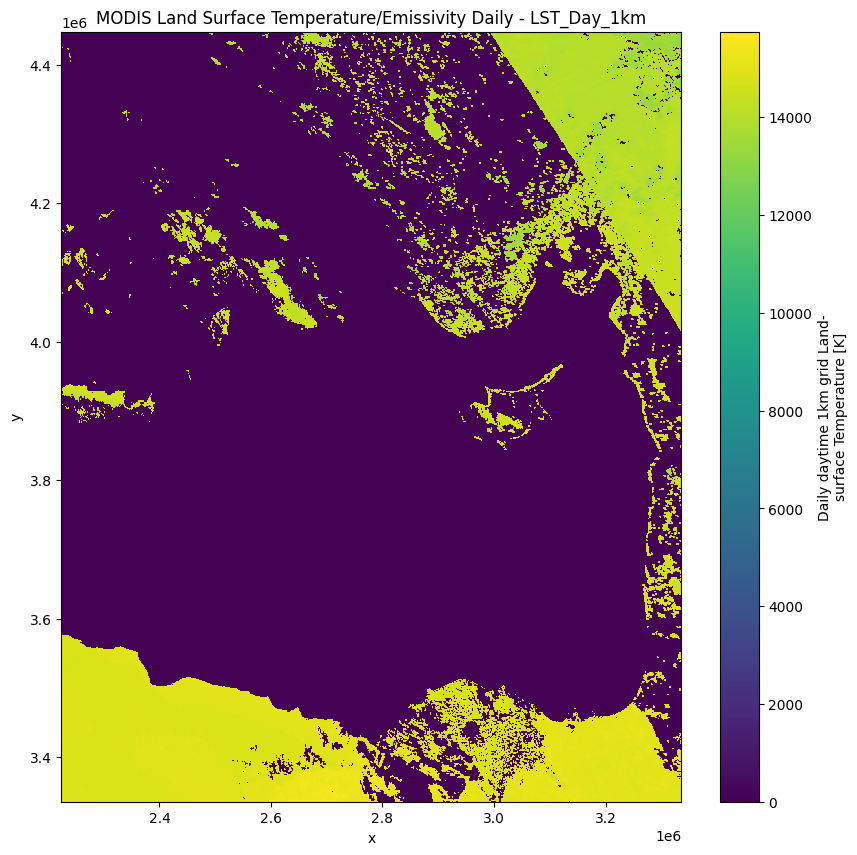

In [ ]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-11A1-061/items/MYD11A1.A2024006.h20v05.061.2024009095019"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "LST_Day_1km"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

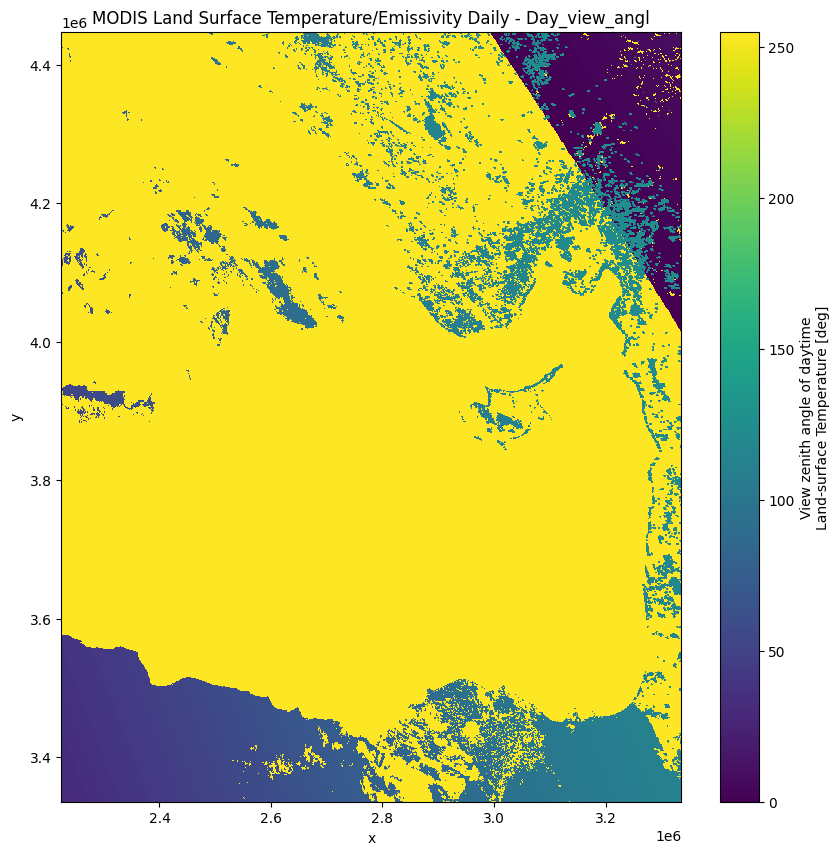

In [ ]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-11A1-061/items/MYD11A1.A2024006.h20v05.061.2024009095019"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Day_view_angl"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

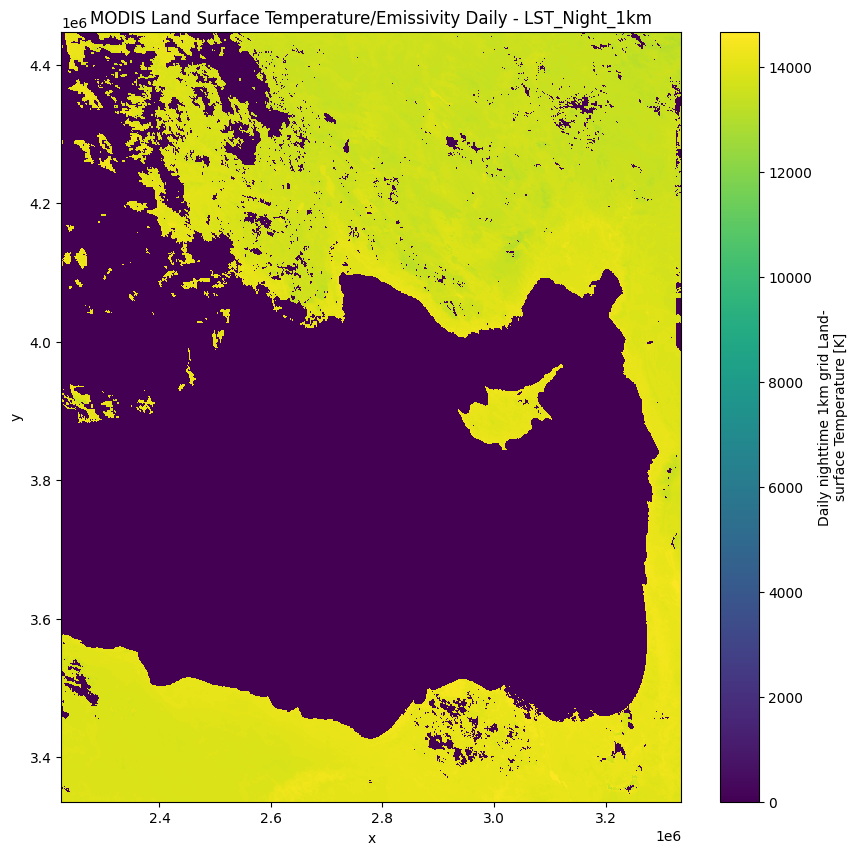

In [ ]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-11A1-061/items/MYD11A1.A2024006.h20v05.061.2024009095019"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "LST_Night_1km"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

# MODIS Land Surface Temperature/Emissivity 8-Day
Daytime land surface temperature 8-day 1km (Kelvin)

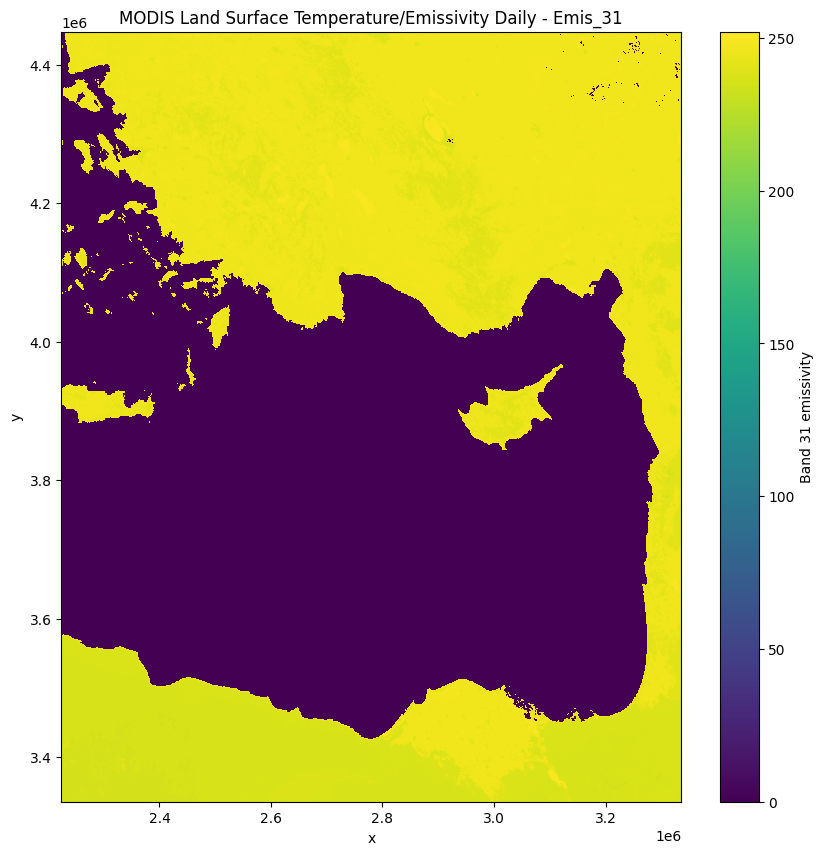

In [ ]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-11A2-061/items/MYD11A2.A2023353.h20v05.061.2023365111921"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Emis_31"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

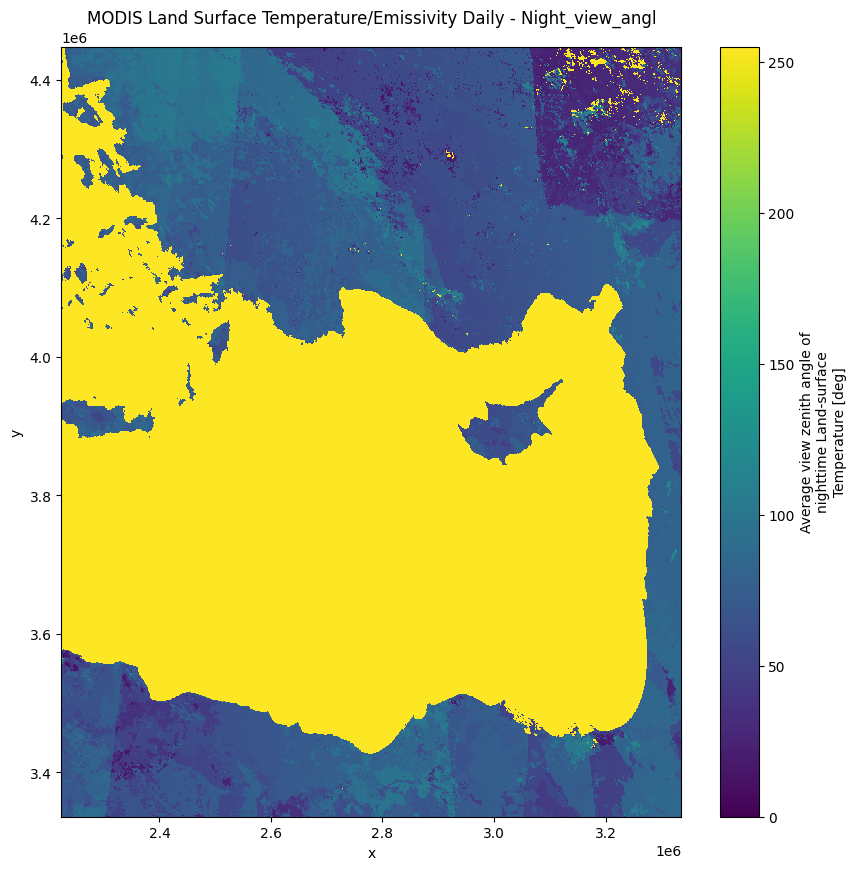

In [ ]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-11A2-061/items/MYD11A2.A2023353.h20v05.061.2023365111921"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Night_view_angl"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

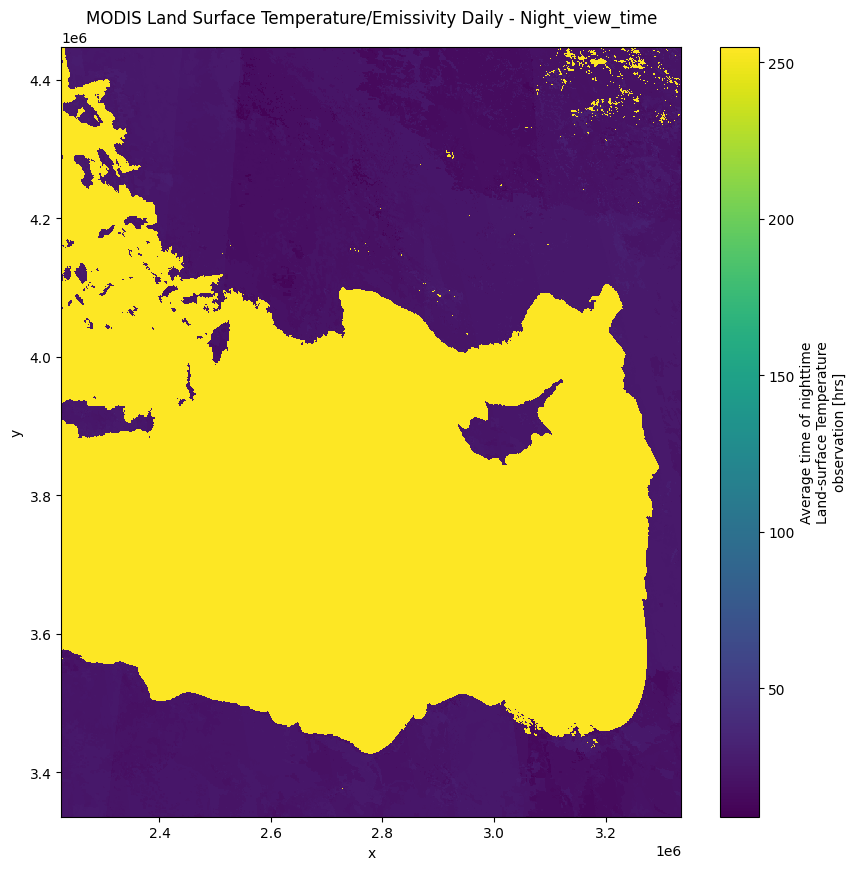

In [ ]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-11A2-061/items/MYD11A2.A2023353.h20v05.061.2023365111921"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Night_view_time"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

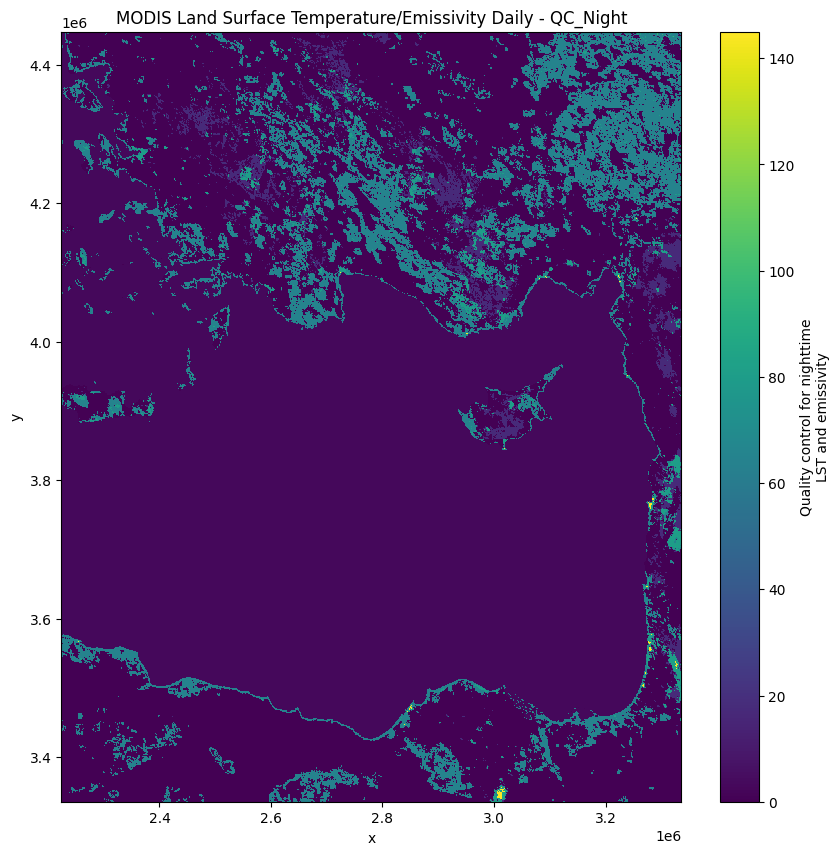

In [ ]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-11A2-061/items/MYD11A2.A2023353.h20v05.061.2023365111921"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "QC_Night"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

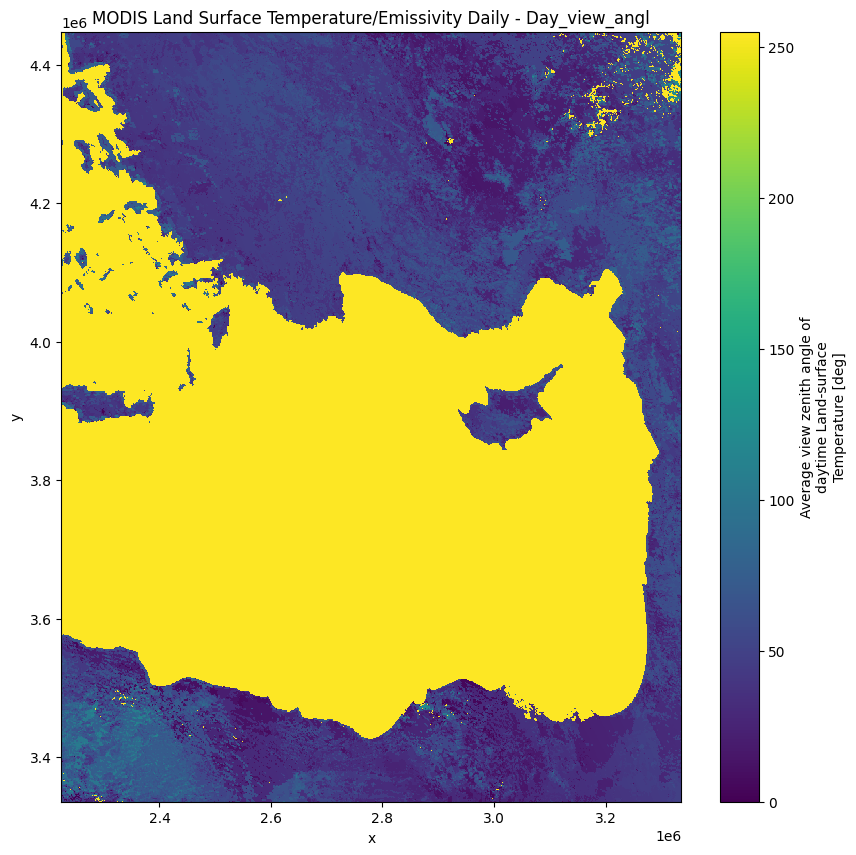

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-11A2-061/items/MYD11A2.A2023353.h20v05.061.2023365111921"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Day_view_angl"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

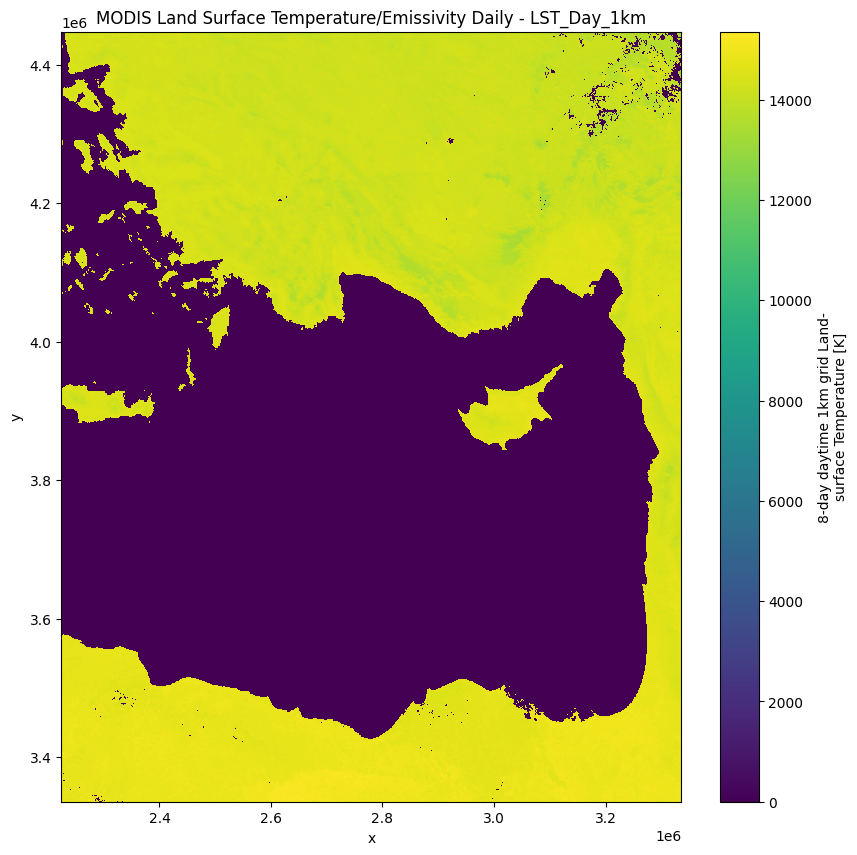

In [ ]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-11A2-061/items/MYD11A2.A2023353.h20v05.061.2023365111921"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "LST_Day_1km"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

# **Temperature**


In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 35.1264,
	"longitude": 33.4299,
	"start_date": "2023-11-12",
	"end_date": "2024-01-01",
	"hourly": "temperature_2m",
	"timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s"),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 35.114234924316406°E 33.47770690917969°N
Elevation 143.0 m asl
Timezone b'Asia/Nicosia' b'EET'
Timezone difference to GMT+0 7200 s
                    date  temperature_2m
0    2023-11-11 22:00:00           17.35
1    2023-11-11 23:00:00           16.75
2    2023-11-12 00:00:00           16.25
3    2023-11-12 01:00:00           16.25
4    2023-11-12 02:00:00           15.85
...                  ...             ...
1219 2024-01-01 17:00:00           13.85
1220 2024-01-01 18:00:00           14.15
1221 2024-01-01 19:00:00           12.75
1222 2024-01-01 20:00:00           13.25
1223 2024-01-01 21:00:00           13.15

[1224 rows x 2 columns]


Coordinates 35.114234924316406°E 33.47770690917969°N
Elevation 143.0 m asl
Timezone b'Asia/Nicosia' b'EET'
Timezone difference to GMT+0 7200 s


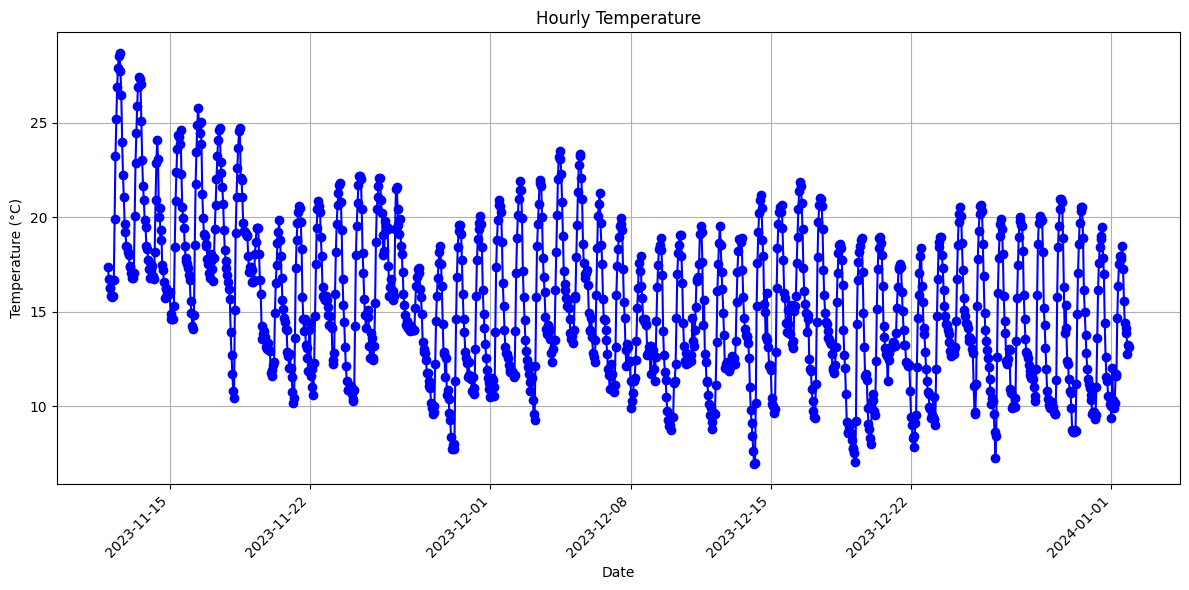

In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
import matplotlib.pyplot as plt

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 35.1264,
    "longitude": 33.4299,
    "start_date": "2023-11-12",
    "end_date": "2024-01-01",
    "hourly": "temperature_2m",
    "timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
    start=pd.to_datetime(hourly.Time(), unit="s"),
    end=pd.to_datetime(hourly.TimeEnd(), unit="s"),
    freq=pd.Timedelta(seconds=hourly.Interval()),
    inclusive="left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m

hourly_dataframe = pd.DataFrame(data=hourly_data)

# Plot the hourly temperature
plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe["date"], hourly_dataframe["temperature_2m"], marker='o', linestyle='-', color='blue')
plt.title("Hourly Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 35.1264,
	"longitude": 33.4299,
	"start_date": "2020-01-01",
	"end_date": "2024-01-01",
	"hourly": "temperature_2m",
	"timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s"),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 35.114234924316406°E 33.47770690917969°N
Elevation 143.0 m asl
Timezone b'Asia/Nicosia' b'EET'
Timezone difference to GMT+0 7200 s
                     date  temperature_2m
0     2019-12-31 22:00:00            5.30
1     2019-12-31 23:00:00            4.90
2     2020-01-01 00:00:00            6.05
3     2020-01-01 01:00:00            6.30
4     2020-01-01 02:00:00            6.30
...                   ...             ...
35083 2024-01-01 17:00:00           13.85
35084 2024-01-01 18:00:00           14.15
35085 2024-01-01 19:00:00           12.75
35086 2024-01-01 20:00:00           13.25
35087 2024-01-01 21:00:00           13.15

[35088 rows x 2 columns]


Coordinates 35.114234924316406°E 33.47770690917969°N
Elevation 143.0 m asl
Timezone b'Asia/Nicosia' b'EET'
Timezone difference to GMT+0 7200 s


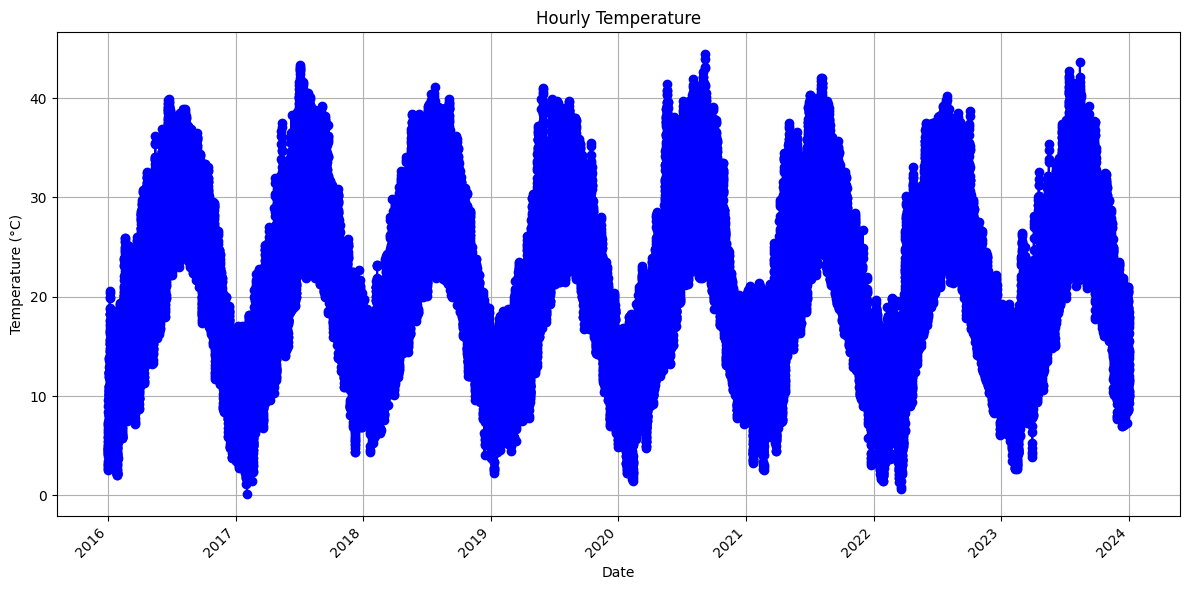

In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
import matplotlib.pyplot as plt

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 35.1264,
    "longitude": 33.4299,
    "start_date": "2016-01-01",
    "end_date": "2024-01-01",
    "hourly": "temperature_2m",
    "timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
    start=pd.to_datetime(hourly.Time(), unit="s"),
    end=pd.to_datetime(hourly.TimeEnd(), unit="s"),
    freq=pd.Timedelta(seconds=hourly.Interval()),
    inclusive="left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m

hourly_dataframe = pd.DataFrame(data=hourly_data)

# Plot the hourly temperature
plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe["date"], hourly_dataframe["temperature_2m"], marker='o', linestyle='-', color='blue')
plt.title("Hourly Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

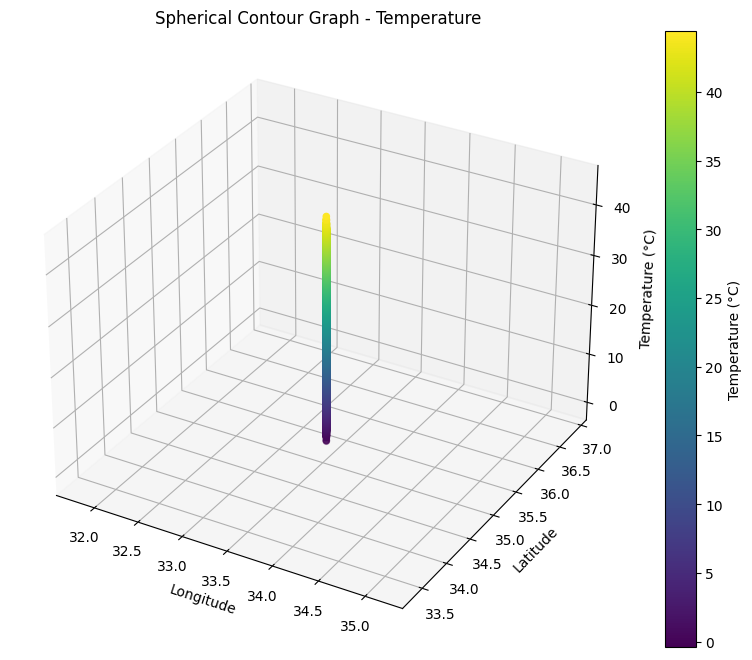

In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 35.1264,
    "longitude": 33.4299,
    "start_date": "1950-01-01",
    "end_date": "2024-01-01",
    "hourly": "temperature_2m",
    "timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {
    "latitude": np.repeat(response.Latitude(), len(hourly_temperature_2m)),
    "longitude": np.repeat(response.Longitude(), len(hourly_temperature_2m)),
    "date": pd.to_datetime(hourly.Time(), unit="s"),
    "temperature_2m": hourly_temperature_2m
}

hourly_dataframe = pd.DataFrame(data=hourly_data)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the spherical contour graph
scatter = ax.scatter(hourly_dataframe['longitude'], hourly_dataframe['latitude'],
                     hourly_dataframe['temperature_2m'], c=hourly_dataframe['temperature_2m'],
                     cmap='viridis', marker='o', s=20)

# Customize the plot
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Temperature (°C)')
ax.set_title('Spherical Contour Graph - Temperature')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Temperature (°C)')

# Show the plot
plt.show()

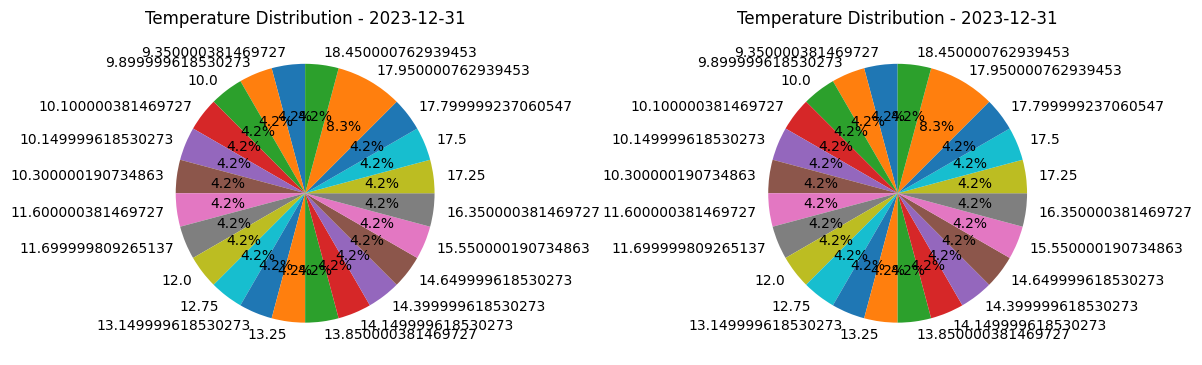

In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
import matplotlib.pyplot as plt

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 35.1264,
    "longitude": 33.4299,
    "start_date": "2024-01-01",
    "end_date": "2024-01-01",
    "hourly": "temperature_2m",
    "timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {
    "date": pd.to_datetime(hourly.Time(), unit="s"),
    "temperature_2m": hourly_temperature_2m
}

hourly_dataframe = pd.DataFrame(data=hourly_data)

# Split the data into multiple time periods or categories
periods = [hourly_dataframe['date'].min(), hourly_dataframe['date'].max()]

# Create subplots for each time period or category
fig, axes = plt.subplots(nrows=1, ncols=len(periods), figsize=(12, 6))

# Plot a pie chart for each time period or category
for i, period in enumerate(periods):
    subset = hourly_dataframe[hourly_dataframe['date'] == period]
    sizes = subset['temperature_2m'].value_counts(normalize=True).sort_index()
    labels = sizes.index
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Temperature Distribution - {period.date()}')

plt.tight_layout()
plt.show()

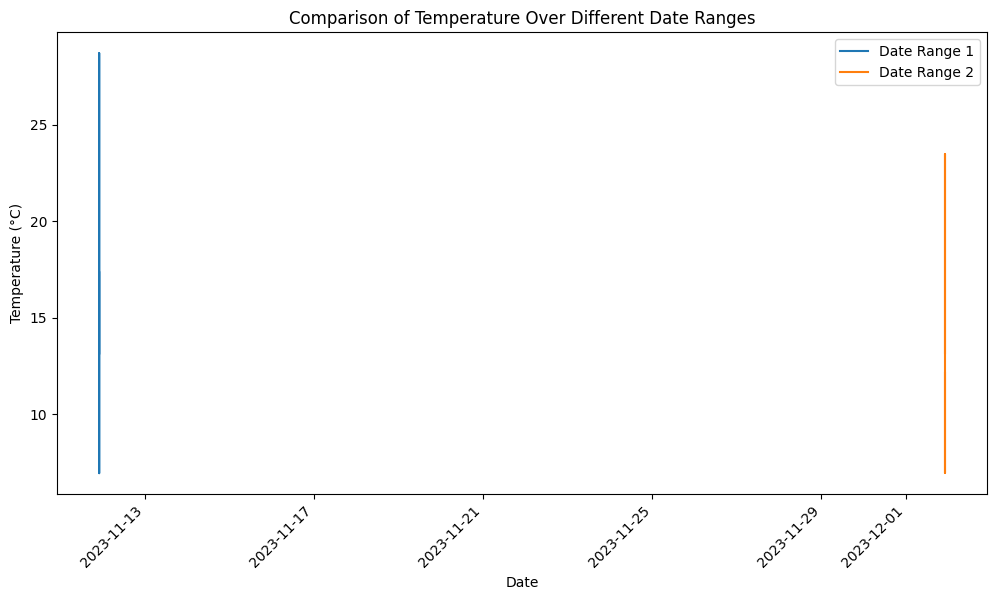

In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
import matplotlib.pyplot as plt

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Common parameters for both date ranges
params_common = {
    "latitude": 35.1264,
    "longitude": 33.4299,
    "hourly": "temperature_2m",
    "timezone": "auto"
}

# First date range
params_1 = {
    **params_common,
    "start_date": "2023-11-12",
    "end_date": "2024-01-01",
}

# Second date range
params_2 = {
    **params_common,
    "start_date": "2023-12-02",
    "end_date": "2024-01-01",
}

# Function to fetch temperature data
def fetch_temperature_data(params):
    responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)
    response = responses[0]
    hourly = response.Hourly()
    return pd.DataFrame({
        "date": pd.to_datetime(hourly.Time(), unit="s"),
        "temperature_2m": hourly.Variables(0).ValuesAsNumpy()
    })

# Fetch temperature data for both date ranges
df_1 = fetch_temperature_data(params_1)
df_2 = fetch_temperature_data(params_2)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_1['date'], df_1['temperature_2m'], label='Date Range 1')
plt.plot(df_2['date'], df_2['temperature_2m'], label='Date Range 2')
plt.title('Comparison of Temperature Over Different Date Ranges')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

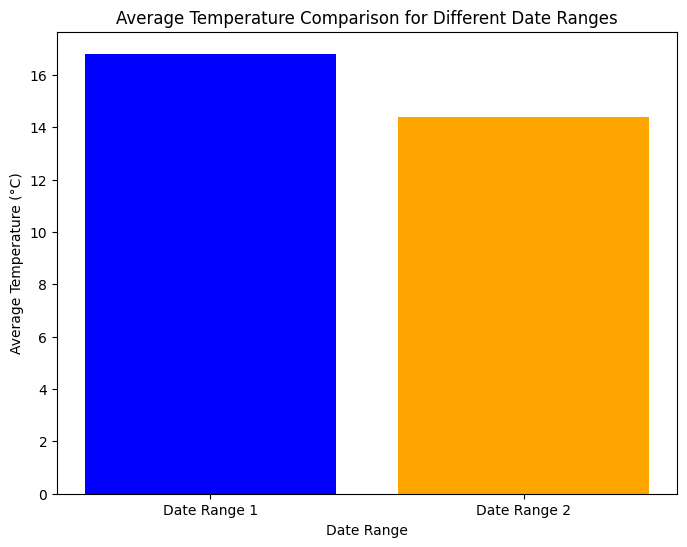

In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
import matplotlib.pyplot as plt

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Common parameters for both date ranges
params_common = {
    "latitude": 35.1264,
    "longitude": 33.4299,
    "hourly": "temperature_2m",
    "timezone": "auto"
}

# First date range
params_1 = {
    **params_common,
    "start_date": "2023-11-12",
    "end_date": "2023-12-01",
}

# Second date range
params_2 = {
    **params_common,
    "start_date": "2023-12-02",
    "end_date": "2024-01-01",
}

# Function to fetch temperature data
def fetch_temperature_data(params):
    responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)
    response = responses[0]
    hourly = response.Hourly()
    return pd.DataFrame({
        "date": pd.to_datetime(hourly.Time(), unit="s"),
        "temperature_2m": hourly.Variables(0).ValuesAsNumpy()
    })

# Fetch temperature data for both date ranges
df_1 = fetch_temperature_data(params_1)
df_2 = fetch_temperature_data(params_2)

# Calculate average temperature for each date range
avg_temp_1 = df_1['temperature_2m'].mean()
avg_temp_2 = df_2['temperature_2m'].mean()

# Plotting bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Date Range 1', 'Date Range 2'], [avg_temp_1, avg_temp_2], color=['blue', 'orange'])
plt.title('Average Temperature Comparison for Different Date Ranges')
plt.xlabel('Date Range')
plt.ylabel('Average Temperature (°C)')
plt.show()



---

